In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [ ]:
checkpoints = r'C:\Users\kingk\Downloads\\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [ ]:
train_dir = r'C:\Users\kingk\Downloads\archive (4)\Computer vision\train'
validation_dir = r'C:\Users\kingk\Downloads\archive (4)\Computer vision\validation'
test_dir = r'C:\Users\kingk\Downloads\archive (4)\Computer vision\test'

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 128)     

In [23]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [27]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                                                        validation_dir,
                                                        target_size=(256, 256),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [29]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [ ]:
model_history = model.fit(train_generator,
                         validation_data =validation_generator,
                         steps_per_epoch=train_generator.n//train_generator.batch_size,
                         validation_steps = validation_generator.n//validation_generator.batch_size,
                         epochs = 20,
                         callbacks = callbacks)

In [32]:
model_history.history

{'loss': [0.7207810282707214,
  0.4900391101837158,
  0.42501571774482727,
  0.3888643682003021,
  0.3579086661338806,
  0.31099388003349304,
  0.29081594944000244,
  0.24582841992378235,
  0.25935620069503784,
  0.22032541036605835,
  0.21490749716758728,
  0.1865641176700592,
  0.18423183262348175,
  0.17870548367500305,
  0.1709398627281189,
  0.1378640979528427,
  0.13622787594795227,
  0.11624112725257874,
  0.11911621689796448,
  0.10659048706293106],
 'acc': [0.6912500262260437,
  0.7724999785423279,
  0.8118749856948853,
  0.8299999833106995,
  0.8500000238418579,
  0.862500011920929,
  0.8812500238418579,
  0.890625,
  0.8968750238418579,
  0.9056249856948853,
  0.9143750071525574,
  0.9300000071525574,
  0.9243749976158142,
  0.9300000071525574,
  0.9275000095367432,
  0.9437500238418579,
  0.949999988079071,
  0.9549999833106995,
  0.956250011920929,
  0.9643750190734863],
 'val_loss': [0.9190986752510071,
  0.4078895151615143,
  0.38141271471977234,
  0.31840720772743225,
 

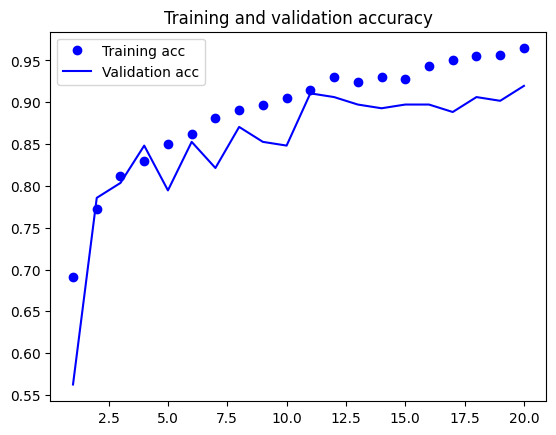

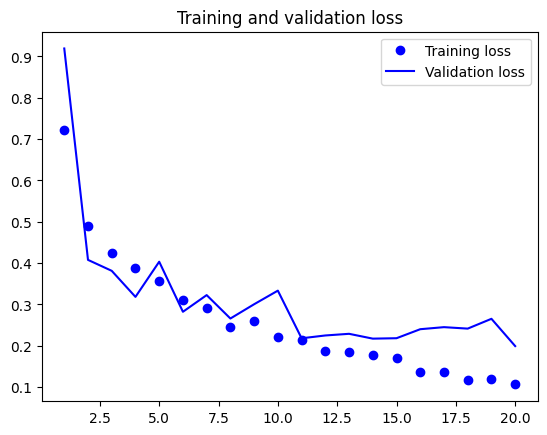

In [ ]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
#plt.savefig(r'C:\Users\kingk\Downloads\archive (4)\Computer vision\model_Accuracy.png')

Found 200 images belonging to 4 classes.
7/7 [==============================] - 5s 662ms/step


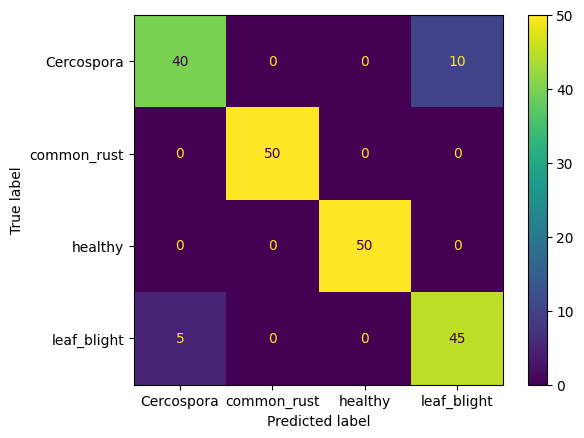

In [ ]:
model = load_model(r'C:\Users\kingk\Downloads\E1-cp-0020-loss0.20.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\kingk\Downloads\archive (4)\E1-cp-0012-loss0.21.h5')

In [44]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.89      0.80      0.84        50
 common_rust       1.00      1.00      1.00        50
     healthy       1.00      1.00      1.00        50
 leaf_blight       0.82      0.90      0.86        50

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200

